**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
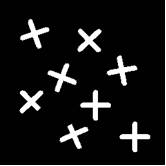
art8lab1.png: 
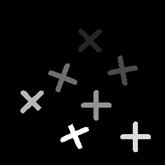
art8lab2.png: 
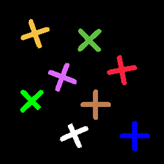
		

Tamanho da imagem :  (256, 256)


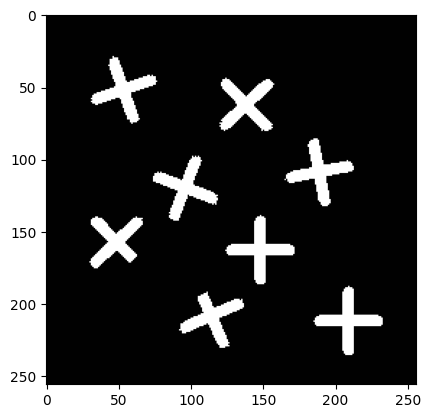

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("art8.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)

print('Tamanho da imagem : ',img.shape)
# convertendo para 300dpi

linhas = img.shape[0]
colunas = img.shape[1]

In [6]:
#Utilizando o código da aula:
img_rotulos = np.zeros(img.shape)
rotulo = 0
equivalencias = {}
x = []
for i in range(linhas):
    for j in range(colunas):
        if i > 0 and j > 0: #Desconsiderando primeira linha e primeira coluna
            t = img[i,j-1]
            r = img[i-1,j]
            if img[i,j] == 255:
                if (t != 255 and r != 255): #Sem vizinhança "ativa"
                    rotulo += 1 #Cria um novo rótulo
                    img_rotulos[i,j] = rotulo
                    #equivalencias[rotulo] = []
                elif t == 255 and r != 255: #Com t "ativo"
                    img_rotulos[i,j] = img_rotulos[i,j-1] # Rótulo de t
                elif t != 255 and r == 255: #Com r "ativo"
                    img_rotulos[i,j] = img_rotulos[i-1,j] # Rótulo de r 
                elif t == 255 and r ==255: #Equivalencia de rótulos
                    if img_rotulos[i,j-1] == img_rotulos[i-1,j]: #Mesmo rótulo
                        img_rotulos[i,j] = img_rotulos[i,j-1]
                    else: #Equivalencia de rotulos
                        menor = min([img_rotulos[i-1,j],img_rotulos[i,j-1]])
                        img_rotulos[i,j] = menor
                        img_rotulos[img_rotulos == img_rotulos[i-1,j]] = menor
                        img_rotulos[img_rotulos == img_rotulos[i,j-1]] = menor

In [7]:
x = []
for i in range(linhas):
    for j in range(colunas):
        x.append(img_rotulos[i,j])

x = list(set(x))
x

[0.0, 1.0, 8.0, 73.0, 46.0, 81.0, 50.0, 82.0, 117.0, 120.0]

In [8]:
img_rotulos[img_rotulos == 1] = 10
img_rotulos[img_rotulos == 8] = 40
img_rotulos[img_rotulos == 73] = 70
img_rotulos[img_rotulos == 46] = 100
img_rotulos[img_rotulos == 81] = 130
img_rotulos[img_rotulos == 50] = 150
img_rotulos[img_rotulos == 82] = 180
img_rotulos[img_rotulos == 117] = 210
img_rotulos[img_rotulos == 120] = 240

### Em tons de cinza

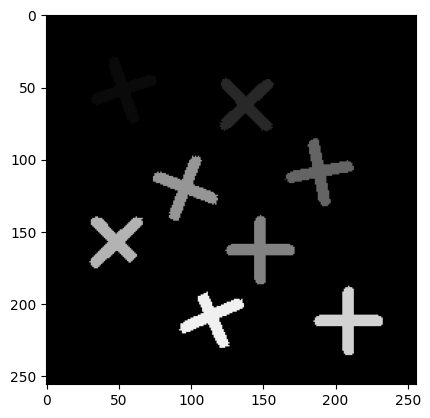

In [9]:
plt.imshow(img_rotulos, cmap='gray', vmin=0, vmax=255)

### Colorido -> precisa melhorar rs

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


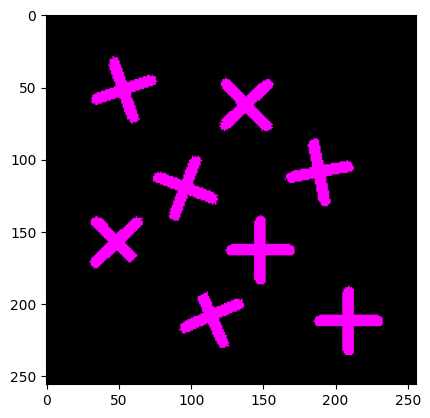

In [10]:
img_rotulos_cor = np.zeros((256,256,3))
img_rotulos_cor[:,:,0] = 0.1*img_rotulos.copy()
#img_rotulos_cor[:,:,1] = img_rotulos.copy()
img_rotulos_cor[:,:,2] = 0.3*img_rotulos.copy()
plt.imshow(img_rotulos_cor)

2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 150, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

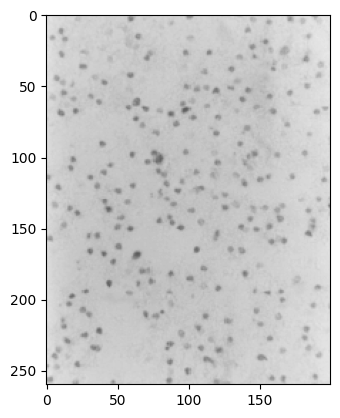

In [11]:
img = cv2.imread("clc3.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

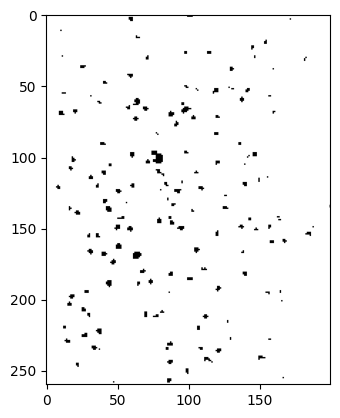

In [12]:
img[img>=150] = 255
img[img<150] = 0
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [13]:
linhas = img.shape[0]
colunas = img.shape[1]

img_rotulos = np.zeros(img.shape)
rotulo = 0
equivalencias = {}
x = []
for i in range(linhas):
    for j in range(colunas):
        if i > 0 and j > 0: #Desconsiderando primeira linha e primeira coluna
            t = img[i,j-1]
            r = img[i-1,j]
            if img[i,j] == 0:
                if (t != 0 and r != 0): #Sem vizinhança "ativa"
                    rotulo += 1 #Cria um novo rótulo
                    img_rotulos[i,j] = rotulo
                    #equivalencias[rotulo] = []
                elif t == 0 and r != 0: #Com t "ativo"
                    img_rotulos[i,j] = img_rotulos[i,j-1] # Rótulo de t
                elif t != 0 and r == 0: #Com r "ativo"
                    img_rotulos[i,j] = img_rotulos[i-1,j] # Rótulo de r 
                elif t == 0 and r ==0: #Equivalencia de rótulos
                    if img_rotulos[i,j-1] == img_rotulos[i-1,j]: #Mesmo rótulo
                        img_rotulos[i,j] = img_rotulos[i,j-1]
                    else: #Equivalencia de rotulos
                        menor = min([img_rotulos[i-1,j],img_rotulos[i,j-1]])
                        img_rotulos[i,j] = menor
                        img_rotulos[img_rotulos == img_rotulos[i-1,j]] = menor
                        img_rotulos[img_rotulos == img_rotulos[i,j-1]] = menor

In [14]:
x = []
for i in range(linhas):
    for j in range(colunas):
        x.append(img_rotulos[i,j])

x = list(set(x))
print(f"Numero de objetos = {len(x)-1}")

Numero de objetos = 160
